## Step 1: Deciding (not) to Segment

McDonald’s can take two positions regarding market segmentation:
- Position 1: McDonald’s may decide to serve the entire market without considering systematic differences across market segments.
- Position 2: Alternatively, McDonald’s may opt to investigate systematic heterogeneity among consumers despite their market power. This approach involves understanding differences among consumer segments and utilizing a differentiated marketing strategy.

## Step 2: Specifying the Ideal Target Segment

McDonald’s management needs to determine the characteristics of the ideal target segment. The target segment(s) should meet the following criteria:
- Homogeneous: Members within the segment should be similar to each other in a key characteristic.
- Distinct: The segment should differ substantially from other segments in a key characteristic.
- Large enough to justify customized marketing efforts.
- Match McDonald’s strengths (e.g., openness to fast food consumption).
- Identifiable: There must be a way to distinguish members of the target segment from others.
- Reachable: Channels of communication and distribution should exist to target the segment effectively.

However, McDonald’s might also aim to understand and modify perceptions of segments less fond of their brand.

## Step 3: Collecting Data

The dataset comprises responses from 1453 adult Australian consumers regarding their perceptions of McDonald’s across various attributes, including YUMMY, CONVENIENT, SPICY, FATTENING, GREASY, FAST, CHEAP, TASTY, EXPENSIVE, HEALTHY, and DISGUSTING. Respondents indicated whether McDonald’s possesses each attribute with a YES or NO response.


In [2]:
# Importing the necessary libraries
import os
import requests
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.mosaicplot import mosaic

In [3]:
# Downloading the Dataset
if not os.path.exists('mcdonalds.csv'):
    data = requests.get(
        'https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv')
    data = data.text
    with open('mcdonalds.csv', 'w') as f:
        f.write(data)
    print('mcdonalds.csv [Downloaded now]')
else:
    print('mcdonalds.csv [Already downloaded]')

mcdonalds.csv [Downloaded now]


## Step 4: Step 4: Exploring Data
First we explore the key characteristics of the data set by loading the data set and inspecting basic features 

Column names and index:
Column 0: yummy
Column 1: convenient
Column 2: spicy
Column 3: fattening
Column 4: greasy
Column 5: fast
Column 6: cheap
Column 7: tasty
Column 8: expensive
Column 9: healthy
Column 10: disgusting
Column 11: Like
Column 12: Age
Column 13: VisitFrequency
Column 14: Gender

First few rows:
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Fem

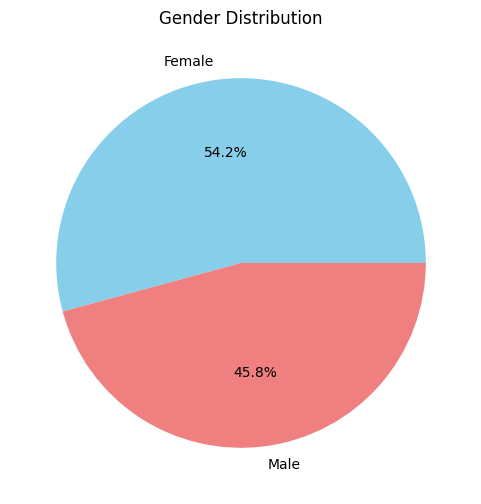

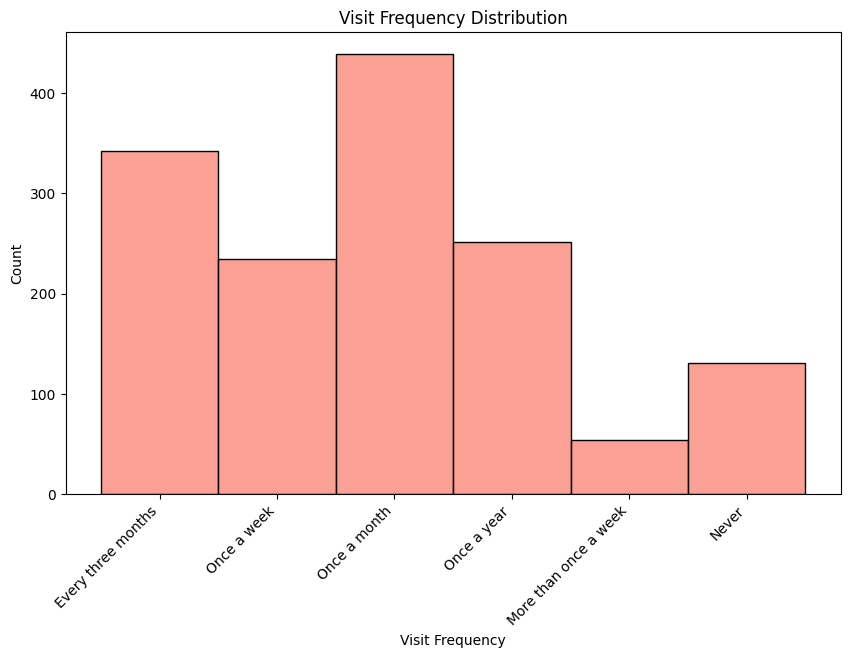

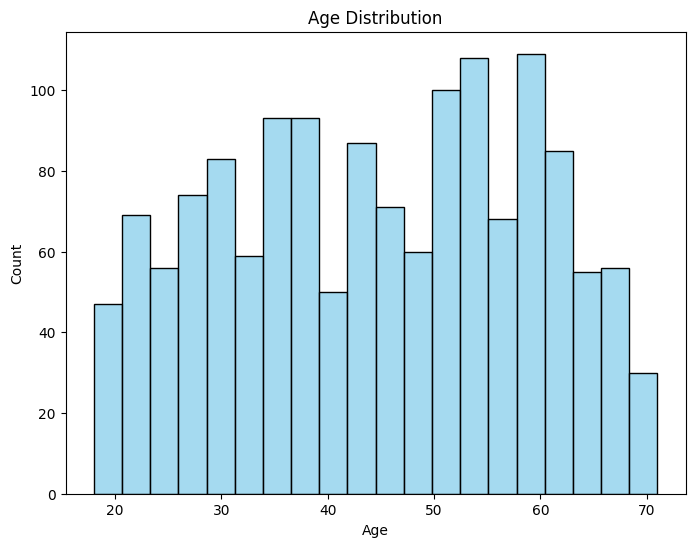

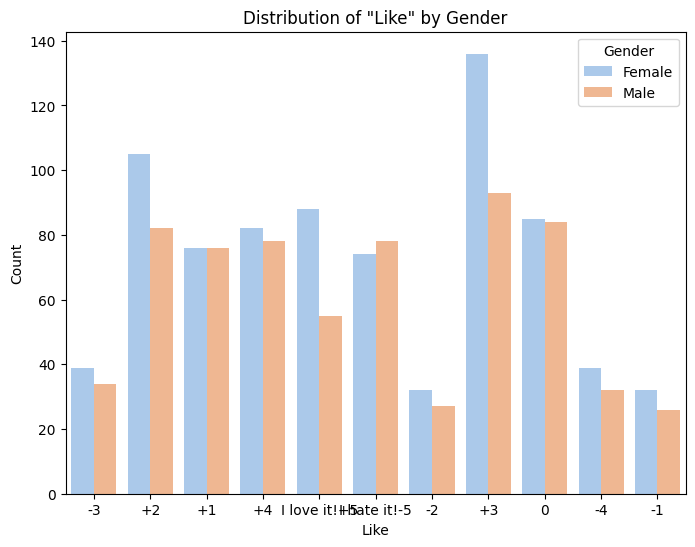

In [5]:
# Performing Basic EDA
def explore_data(data_file):
    # Load the data
    df = pd.read_csv(data_file)

    # Print column names and index
    print("Column names and index:")
    for idx, col in enumerate(df.columns):
        print(f"Column {idx}: {col}")

    # Display the first few rows
    print("\nFirst few rows:")
    print(df.head())

    # Get the number of rows and columns
    print("\nNumber of rows and columns:")
    print(df.shape)
    
    # Pie chart for Gender distribution
    plt.figure(figsize=(6, 6))
    df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
    plt.title('Gender Distribution')
    plt.ylabel('')
    plt.show()

    # Histogram for Visit Frequency
    plt.figure(figsize=(10, 6))
    sns.histplot(df['VisitFrequency'], color='salmon', bins=10)
    plt.title('Visit Frequency Distribution')
    plt.xlabel('Visit Frequency')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # Histogram for Age distribution
    plt.figure(figsize=(8, 6))
    sns.histplot(df['Age'], color='skyblue', bins=20)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()

    # Count plot for 'Like' distribution based on gender
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Like', hue='Gender', data=df, palette='pastel')
    plt.title('Distribution of "Like" by Gender')
    plt.xlabel('Like')
    plt.ylabel('Count')
    plt.show()

# Usage:
data_file = "mcdonalds.csv"  # specify the path to your data file
explore_data(data_file)


In [6]:
df = pd.read_csv('mcdonalds.csv')
df = df.replace({"Yes": 1, "No": 0})

C:\Users\anubh\AppData\Local\Temp\ipykernel_21928\1885536871.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"Yes": 1, "No": 0})


In [7]:
df1 = df.iloc[:, :11]
temp = df1.mean().round(2)
temp

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

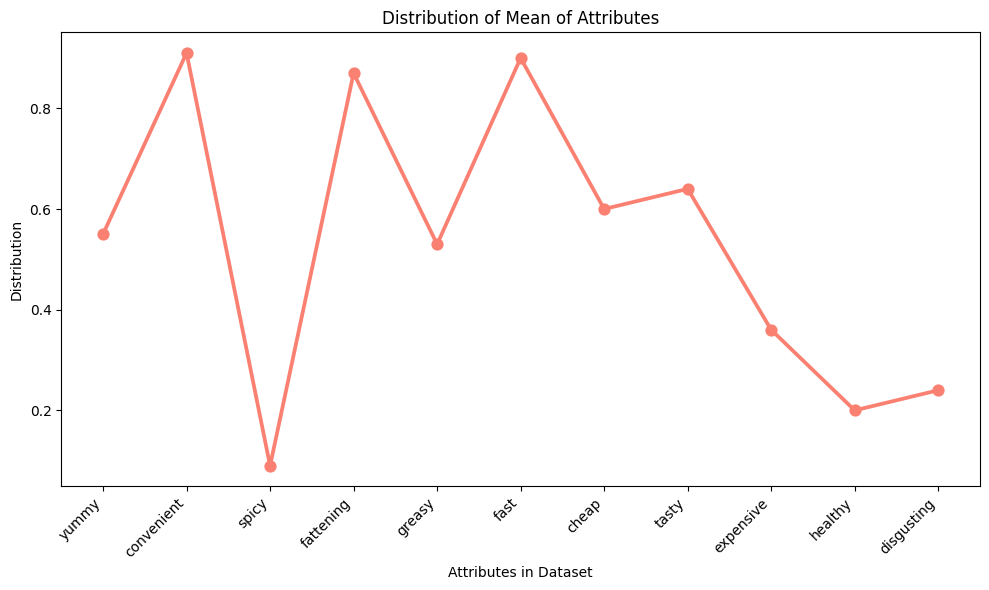

In [11]:
# visualization using pointplot
plt.figure(figsize=(10, 6))
sns.pointplot(x=temp.index, y=temp, color='salmon')
plt.title('Distribution of Mean of Attributes')
plt.xlabel('Attributes in Dataset')
plt.ylabel('Distribution')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [12]:
# Principal Component Analysis
scaler = StandardScaler()
df2 = scaler.fit_transform(df1)

pca = PCA()
df2 = pca.fit_transform(df2)

pca_df = pd.DataFrame(df2, columns=df1.columns)
pca_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


In [13]:
pca_df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
count,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03,1.453000e+03
mean,-1.467053e-16,-1.002486e-16,7.579775e-17,-9.046828e-17,3.545378e-17,5.256940e-17,-2.567343e-17,1.222544e-17,-1.100290e-16,-9.352464e-17,-4.523414e-17
std,1.677250e+00,1.277868e+00,1.175207e+00,1.040053e+00,9.586196e-01,8.846128e-01,8.457741e-01,7.698704e-01,7.240648e-01,5.548094e-01,5.069825e-01
min,-2.883694e+00,-2.229399e+00,-1.852180e+00,-1.481192e+00,-2.808926e+00,-2.775970e+00,-2.791864e+00,-2.037274e+00,-2.291970e+00,-1.596087e+00,-1.788916e+00
25%,-1.082756e+00,-8.196100e-01,-8.166025e-01,-7.415504e-01,-6.594894e-01,-6.525637e-01,-5.180840e-01,-4.690456e-01,-4.512112e-01,2.327974e-02,-6.189398e-02
50%,-2.275531e-01,-4.300592e-02,-1.739581e-01,-1.634068e-01,-2.368836e-02,-6.102541e-02,3.398968e-02,2.066852e-01,9.809878e-02,1.212930e-01,5.602312e-02
75%,1.079822e+00,9.227436e-01,6.062742e-01,1.380806e-01,4.441573e-01,4.651667e-01,6.711110e-01,5.707646e-01,4.033967e-01,1.917207e-01,1.920805e-01
max,4.566454e+00,4.102422e+00,4.199369e+00,4.202991e+00,3.606405e+00,4.201958e+00,3.693790e+00,2.829568e+00,2.462379e+00,1.849848e+00,1.834070e+00


In [14]:
pd.DataFrame(
    pca.components_, 
    columns=[f'PC{i}' for i in range(1, 12)], 
    index=pca_df.columns
)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.406955,-0.308827,-0.023320,0.177861,0.267796,-0.213039,-0.289134,-0.426115,0.290944,-0.266839,0.410744
convenient,0.282615,-0.045682,0.069982,-0.205590,-0.136300,-0.282441,-0.575032,0.242199,0.567528,0.201031,-0.143888
spicy,-0.259588,-0.317151,0.020170,-0.608077,-0.389568,-0.211395,0.125157,-0.269648,-0.183298,0.367814,0.090299
fattening,0.026237,-0.009424,0.845496,-0.023396,0.330854,0.090363,0.114477,0.072691,0.035510,0.301990,0.235231
greasy,0.346857,-0.437148,-0.185551,0.086934,0.343713,-0.568939,0.256981,0.286099,-0.207362,0.051787,0.105843
fast,-0.124916,0.188966,0.438661,0.107520,-0.278329,-0.572734,0.020657,-0.053053,-0.171160,-0.446166,-0.328041
cheap,0.159878,-0.661814,0.214188,-0.023851,-0.307300,0.392436,-0.008895,0.197364,0.015198,-0.449446,-0.017070
tasty,0.016587,0.150033,-0.027835,-0.720478,0.487275,0.055976,-0.064667,0.059289,-0.061727,-0.446110,-0.079122
expensive,-0.195341,-0.336539,0.025239,0.105052,0.346137,0.099235,-0.062027,-0.213587,-0.009675,0.219269,-0.780777
healthy,0.691446,0.028831,0.058187,-0.020311,-0.015160,0.017917,0.060323,-0.713426,0.029581,-0.054544,-0.016028


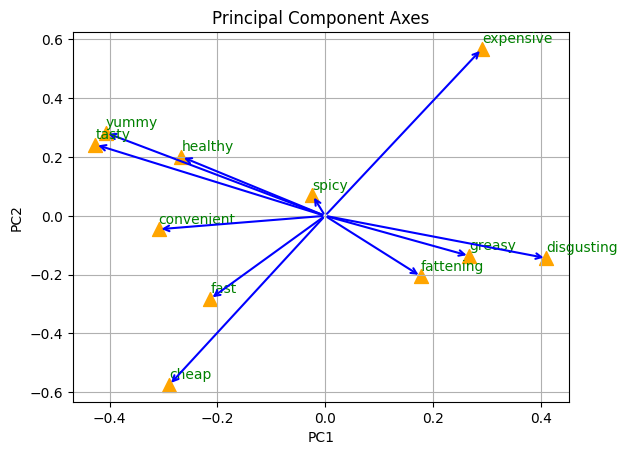

In [16]:
scale = 1

for i, j in enumerate(pca_df.columns):
    plt.text(
        pca.components_[0, :][i] * scale,
        (pca.components_[1, :][i] + 0.02) * scale,
        j, color='green', fontsize=10  # Adjust color and fontsize
    )
    plt.annotate(
        '', xytext=(0, 0),
        xy=(pca.components_[0, :][i] * scale,
            pca.components_[1, :][i] * scale),
        arrowprops=dict(
            arrowstyle="->",
            color='blue',  # Change arrow color
            linewidth=1.5  # Adjust arrow thickness
        )
    )
plt.scatter(
    pca.components_[0, :] * scale,
    pca.components_[1, :] * scale,
    color='orange', marker='^', s=100  # Change scatter color, marker, and size
)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Axes')
plt.grid(True)  # Add grid for better visualization
plt.show()


## Step 5: Extracting Segments

In [17]:
np.random.seed(0)
k_range = range(2, 9)
inertias = []
k_result = []
silhouette_scores = []
for k in k_range:
    model = KMeans(
        n_clusters=k, 
        n_init=10, 
        random_state=0)
    model.fit(pca_df)
    labels = model.predict(pca_df)
    silhouette_score_ = silhouette_score(
        pca_df, 
        labels
    )
    silhouette_scores.append(silhouette_score_)
    inertias.append(model.inertia_)
    k_result.append(labels)

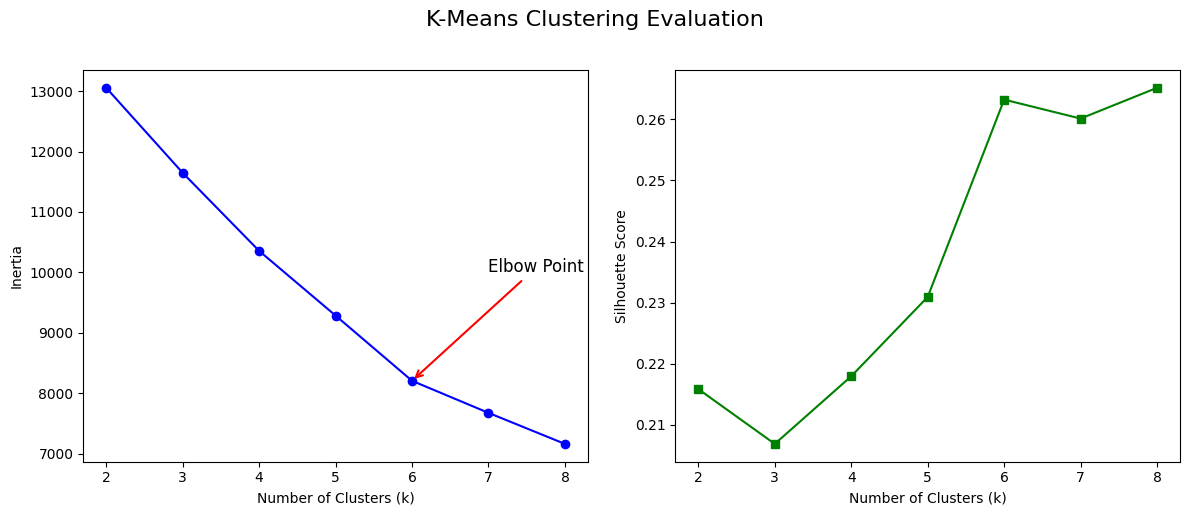

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # Adjust figsize for better readability
axs[0].plot(range(2, 9), inertias, marker='o', color='blue')  # Add markers and specify color
axs[0].annotate(
    'Elbow Point', xy=(6, inertias[4]), xytext=(7, 10000),
    arrowprops=dict(arrowstyle="->", color='red', linewidth=1.5), fontsize=12
)  # Adjust arrowprops and fontsize
axs[1].plot(range(2, 9), silhouette_scores, marker='s', color='green')  # Add markers and specify color
axs[0].set(xlabel='Number of Clusters (k)', ylabel='Inertia')  # Improve axis labels
axs[1].set(xlabel='Number of Clusters (k)', ylabel='Silhouette Score')  # Improve axis labels
fig.suptitle('K-Means Clustering Evaluation', fontsize=16, y=1.02)  # Add a title with improved fontsize and position
plt.tight_layout()  # Adjust subplot layout
plt.show()


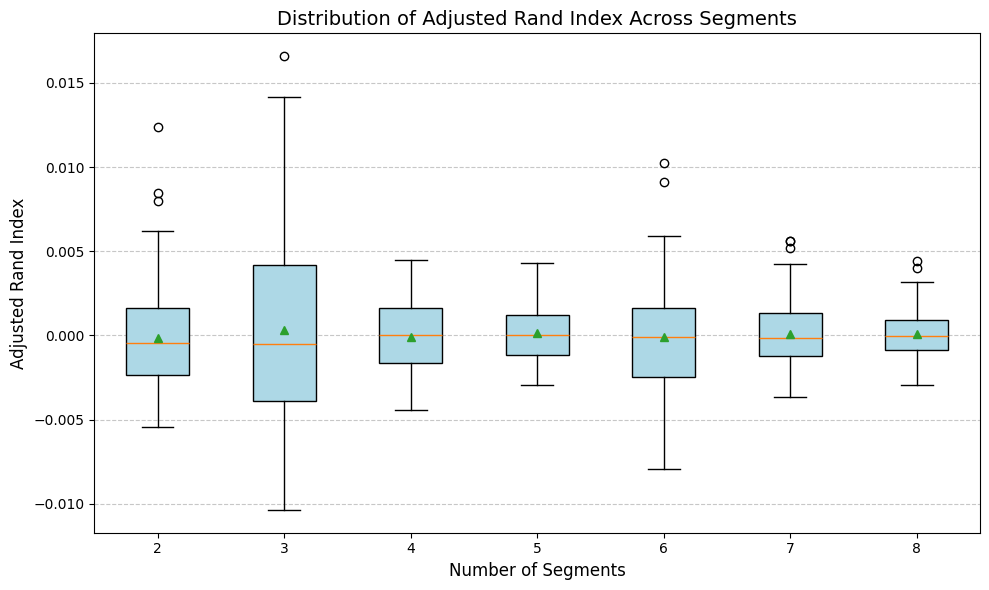

In [20]:
n_boot = 100
ARI_scores = []

for labels in k_result:
    ari_boot = []
    for _ in range(n_boot):
        random_sample = np.random.choice(
            labels, 
            size=len(labels), 
            replace=True
        )
        ari = adjusted_rand_score(
            labels, 
            random_sample
        )
        ari_boot.append(ari)
    ARI_scores.append(ari_boot)

# Create a boxplot with improved aesthetics
plt.figure(figsize=(10, 6))
plt.boxplot(ARI_scores, labels=range(2, 9), patch_artist=True, boxprops=dict(facecolor='lightblue'), showmeans=True)
plt.xlabel('Number of Segments', fontsize=12)
plt.ylabel('Adjusted Rand Index', fontsize=12)
plt.title('Distribution of Adjusted Rand Index Across Segments', fontsize=14)
plt.xticks(fontsize=10)  # Adjust x-axis label font size
plt.yticks(fontsize=10)  # Adjust y-axis label font size
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization
plt.tight_layout()  # Adjust layout
plt.show()


Confusion Matrix:
[[111  16   4  47]
 [196   7  26 131]
 [372   6   5 168]
 [  0 105  26 233]]


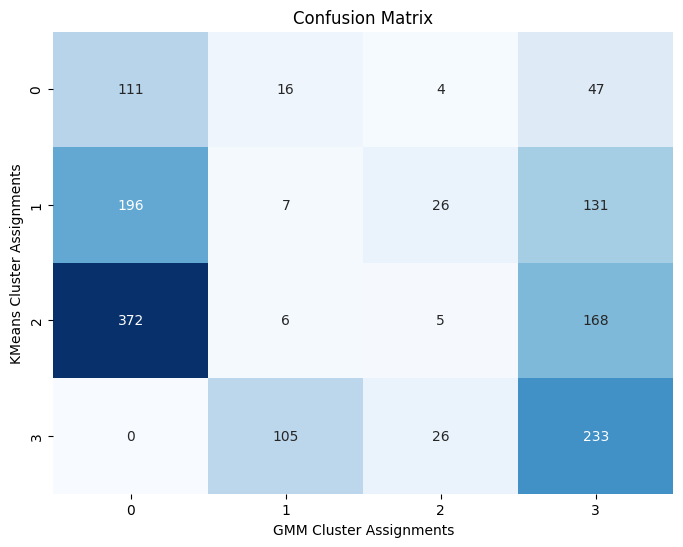

In [22]:
gmm = GaussianMixture(
    n_components=4, 
    covariance_type='full', 
    random_state=1234
)
gmm.fit(pca_df)

cluster_assignments_gmm = gmm.predict(pca_df)

model = KMeans(
    n_clusters=4, 
    n_init=10, 
    random_state=0
)
model.fit(pca_df)
labels = model.predict(pca_df)

conf_matrix = confusion_matrix(labels, cluster_assignments_gmm)

print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('GMM Cluster Assignments')
plt.ylabel('KMeans Cluster Assignments')
plt.title('Confusion Matrix')
plt.show()


## Step-6: Profiling Segments

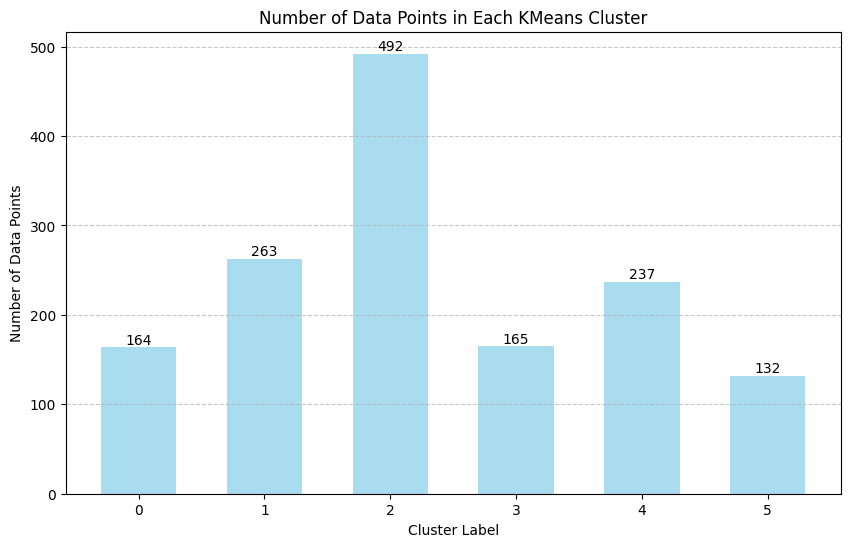

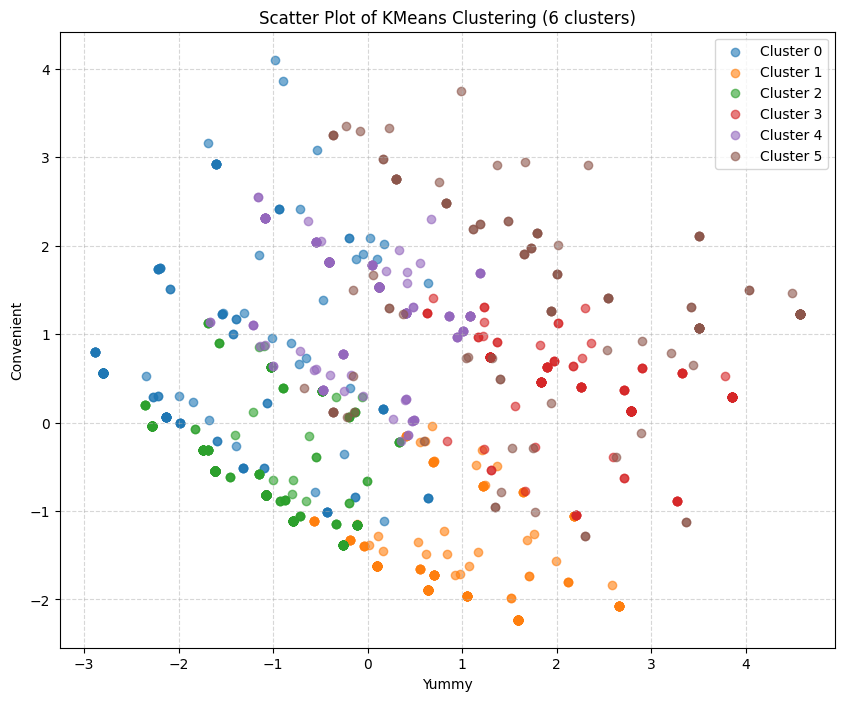

In [25]:
# Fit KMeans model
k6 = KMeans(n_clusters=6)
k6.fit(pca_df)
l6 = k6.predict(pca_df)

# Bar chart
plt.figure(figsize=(10, 6))
x = range(6)
height = [sum(l6 == i) for i in range(6)]
bars = plt.bar(x, height, alpha=0.7, color='skyblue', width=0.6)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, int(yval), va='bottom', ha='center')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points in Each KMeans Cluster')
plt.xticks(x)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Scatter plot
plt.figure(figsize=(10, 8))
for i in range(6):
    temp = pca_df[['yummy', 'convenient']][l6 == i]
    plt.scatter(
        temp['yummy'],
        temp['convenient'],
        label=f'Cluster {i}',
        alpha=0.6
    )
plt.xlabel('Yummy')
plt.ylabel('Convenient')
plt.title('Scatter Plot of KMeans Clustering (6 clusters)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


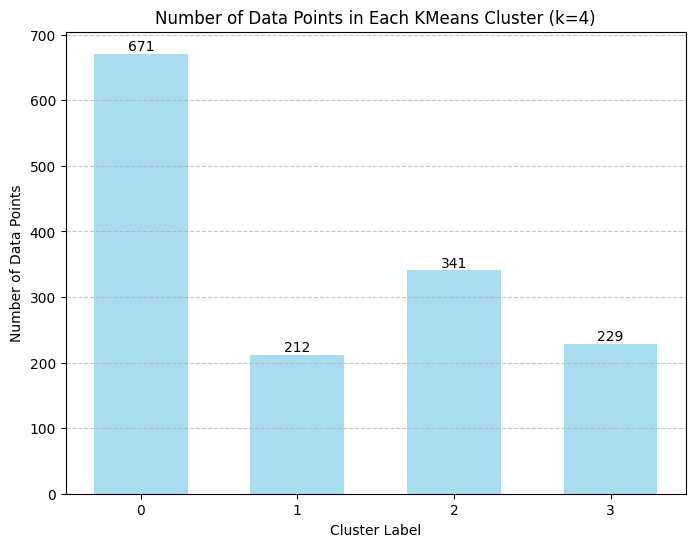

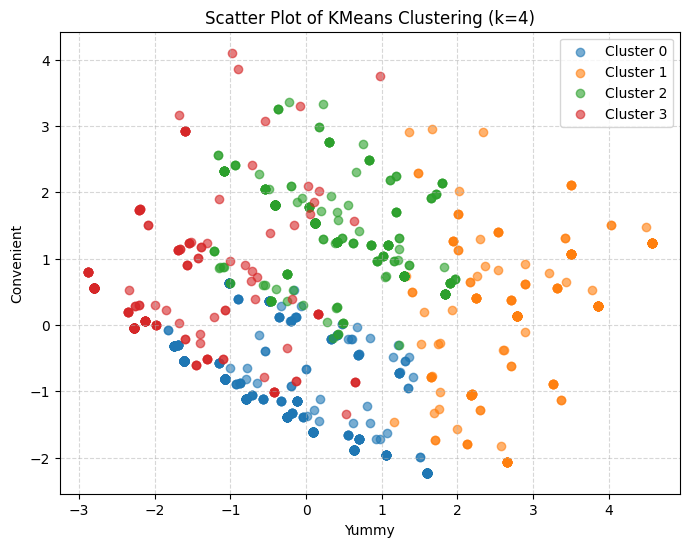

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fit KMeans model
k4 = KMeans(n_clusters=4)
k4.fit(pca_df)
l4 = k4.predict(pca_df)

# Bar chart
plt.figure(figsize=(8, 6))
x = range(4)
height = [sum(l4 == i) for i in range(4)]
bars = plt.bar(x, height, alpha=0.7, color='skyblue', width=0.6)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, int(yval), va='bottom', ha='center')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points in Each KMeans Cluster (k=4)')
plt.xticks(x)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Scatter plot
plt.figure(figsize=(8, 6))
for i in range(4):
    temp = pca_df[['yummy', 'convenient']][l4 == i]
    plt.scatter(
        temp['yummy'],
        temp['convenient'],
        label=f'Cluster {i}',
        alpha=0.6
    )
plt.xlabel('Yummy')
plt.ylabel('Convenient')
plt.title('Scatter Plot of KMeans Clustering (k=4)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


## Step-7: Describing the Segments

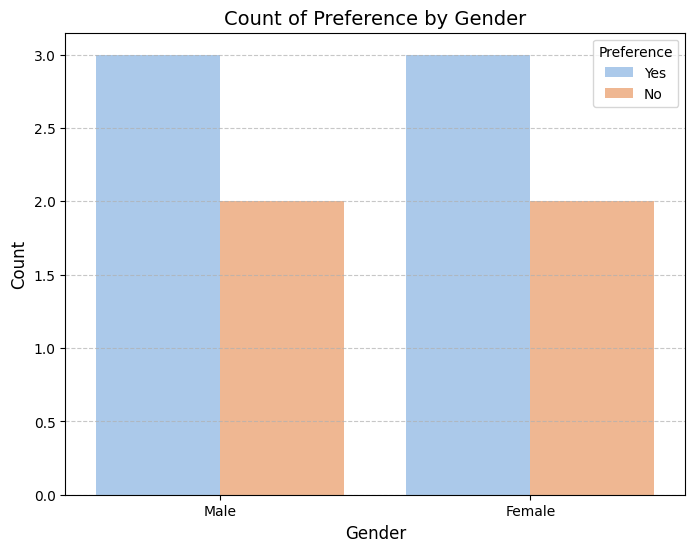

<Figure size 1000x800 with 0 Axes>

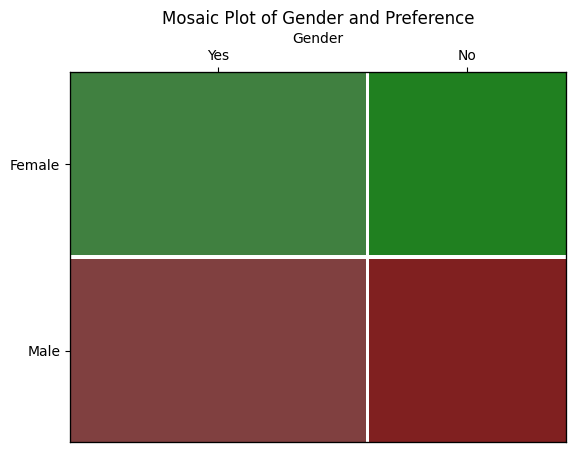

In [31]:
# Create a sample data frame with more entries
data = {
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Preference': ['Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}
example_df = pd.DataFrame(data)
import seaborn as sns
import matplotlib.pyplot as plt

# Grouped bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Preference', data=example_df, palette='pastel')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Preference by Gender', fontsize=14)
plt.legend(title='Preference')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Create a mosaic plot
plt.figure(figsize=(10, 8))  # Adjust the figure size
mosaic(example_df, ['Gender', 'Preference'], gap=0.01, horizontal=False, axes_label=True, labelizer=lambda k: '')

# Adjust labels and title
plt.xlabel('Gender')  # Adjust label fontsize
plt.ylabel('Preference')  # Adjust label fontsize
plt.title('Mosaic Plot of Gender and Preference')  # Adjust title fontsize
plt.grid(False)  # Turn off grid lines for better visualization

plt.show()


In [32]:
# Create a copy of the DataFrame to avoid modifying the original DataFrame
df2 = df.copy()

# Add the 'segments' column
df2['segments'] = l4

# Display the first few rows of the DataFrame
print(df2.head())


   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting Like  Age      VisitFrequency  Gender  segments  
0        0           0   -3   61  Every three months  Female         0  
1        0           0   +2   51  Every three months  Female         2  
2        1           0   +1   62  Every three months  Female         2  
3        0           1   +4   69         Once a week  Female         0  
4        1           0   +2   49        Once a month    Male         0  


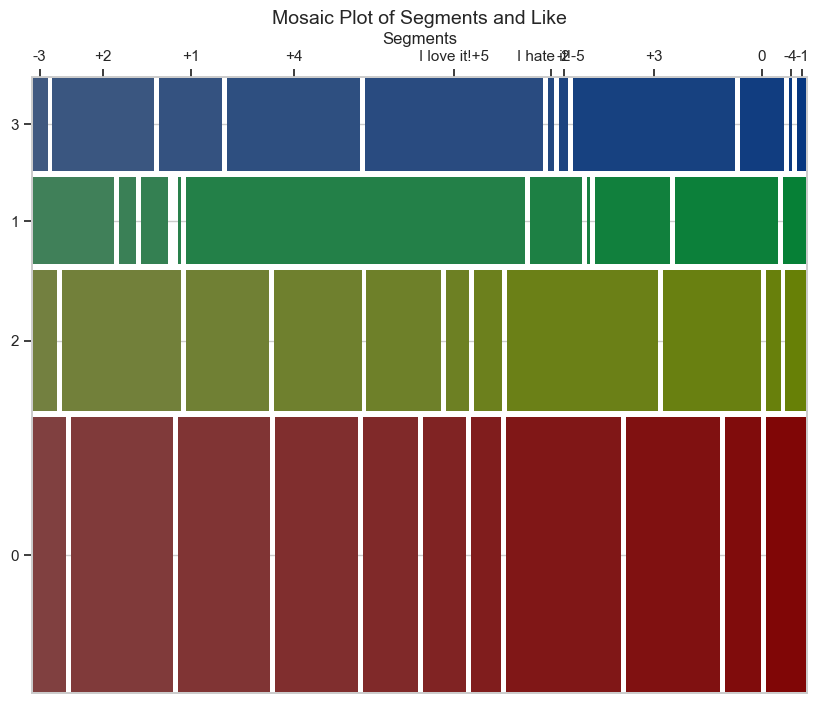

In [38]:
# Set a seaborn style for better aesthetics
sns.set(style="whitegrid")

# Adjust the figure size
plt.figure(figsize=(10, 8))

# Create the mosaic plot
mosaic(df2, ['segments', 'Like'], gap=0.01, horizontal=False, axes_label=True, labelizer=lambda k: '', ax=plt.gca())

# Adjust labels and title
plt.xlabel('Segments', fontsize=12)
plt.ylabel('Like', fontsize=12)
plt.title('Mosaic Plot of Segments and Like', fontsize=14)
plt.grid(False)

plt.show()


## Step-8: Selecting the Target Segment


C:\Users\anubh\AppData\Local\Temp\ipykernel_21928\548197366.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['VisitFrequency'] = df['VisitFrequency'].replace({


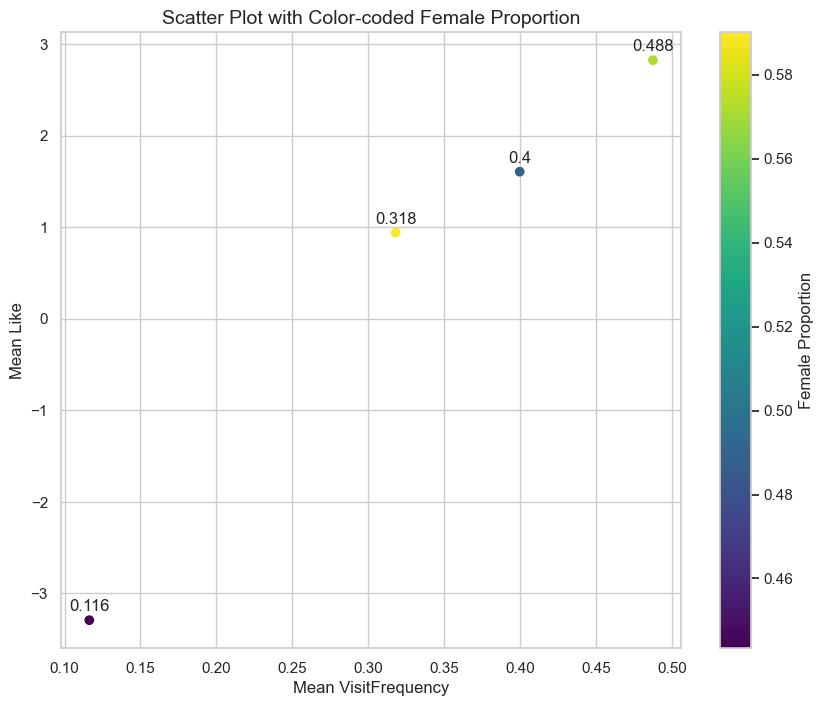

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_segment_data(df):
    # Data preprocessing
    df['Like'] = df['Like'].str.extract(r'([-\d]+)').astype(int)
    df['VisitFrequency'] = df['VisitFrequency'].replace({
        'Every three months': 1/(4*3), 
        'Once a week': 1, 
        'Once a month': 1/4, 
        'Once a year': 1/52,
        'More than once a week': 2, 
        'Never': 0
    })

    # Calculate means by segment
    visit_means = df.groupby("segments")["VisitFrequency"].mean()
    like_means = df.groupby("segments")["Like"].mean()
    female_means = df.groupby("segments")["Gender"].apply(lambda x: (x == "Female").mean())

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.scatter(
        visit_means, 
        like_means, 
        c=female_means, 
        cmap="viridis"
    )

    # Add labels and title
    plt.xlabel("Mean VisitFrequency", fontsize=12)
    plt.ylabel("Mean Like", fontsize=12)
    plt.title("Scatter Plot with Color-coded Female Proportion", fontsize=14)
    plt.colorbar(label="Female Proportion")

    # Add text labels to the points
    for i, j, k in zip(visit_means, like_means, visit_means):
        plt.text(i, j+0.1, round(k, 3), ha='center')

    plt.show()

df = pd.DataFrame(data)

# Call the function to visualize the data
visualize_segment_data(df2)
